In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df1 = pd.read_csv("data\steam.csv")

#### EDA

c:\Users\USUARIO\Desktop\P1MLOps\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


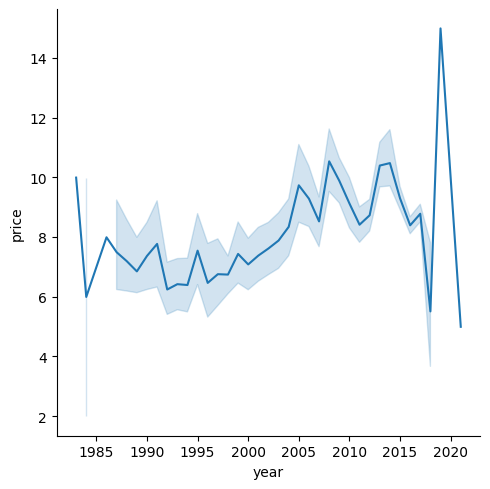

In [4]:
sns.relplot(x= "year", y = "price", data = df1, kind= "line")

In [5]:
#Promedio histórico del precio
df1.price.mean()

9.018411835748793

In [6]:
df1.price.describe()

count    21528.000000
mean         9.018412
std         12.621023
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        771.710000
Name: price, dtype: float64

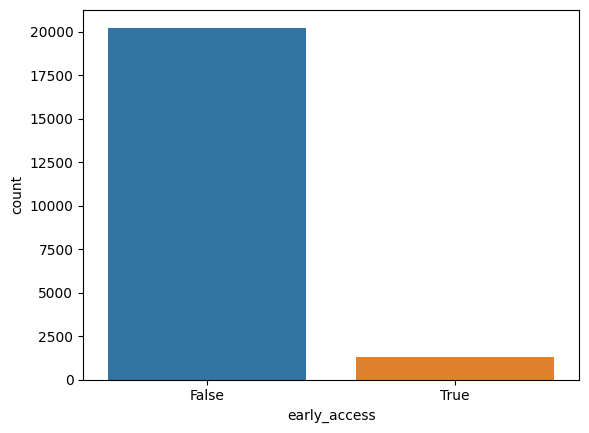

In [7]:
sns.countplot(x ="early_access", data = df1)
plt.show()

In [8]:
# Obtenemos la distribución de cada valor dentro de la variable en porcentaje
percentage_true = df1['early_access'].value_counts(normalize=True) * 100
percentage_true

early_access
False    93.975288
True      6.024712
Name: proportion, dtype: float64

In [9]:
df1.sentiment.value_counts()

sentiment
Mixed                      3694
Very Positive              3491
Positive                   2722
Mostly Positive            2444
1 user reviews             2098
2 user reviews             1456
3 user reviews             1005
4 user reviews              813
Mostly Negative             728
5 user reviews              700
6 user reviews              618
7 user reviews              486
8 user reviews              440
9 user reviews              402
Overwhelmingly Positive     286
Negative                    112
Very Negative                26
Overwhelmingly Negative       7
Name: count, dtype: int64

La columna "sentiment" presenta el siguiente problema: más de 8000 datos corresponden a las categorías que van de 1 user reviews a 9 user reviews. Estas categorías a diferencia de las otras no tienen un criterio jerárquico de valoración. Este criterio debe proporcionárnoslo el stakeholder. 

In [24]:
df1.head()

,genres,app_name,specs,price,early_access,id,sentiment,metascore,year,genre_id,spec_id
0,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Mostly Positive,0.0,2018,"[20, 3, 21, 10]","[17, 20, 24, 2, 27, 4, 9]"
1,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,670290,Mostly Positive,0.0,2017,"[17, 20, 3, 6, 11]","[17, 20, 24, 9, 14]"
2,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,"['Single-player', 'Steam Achievements']",3.99,False,772540,Mixed,0.0,2018,"[15, 12, 6]","[17, 27]"
3,"['Adventure', 'Casual', 'Indie', 'Simulation',...",The first thrust of God,"['Single-player', 'Steam Achievements', 'Steam...",1.59,False,773650,1 user reviews,0.0,2018,"[12, 17, 3, 6, 10]","[17, 27, 19]"
4,"['Action', 'Adventure', 'Indie']",The Warrior Of Treasures,['Single-player'],0.99,False,768060,3 user reviews,0.0,2018,"[15, 12, 3]",[17]


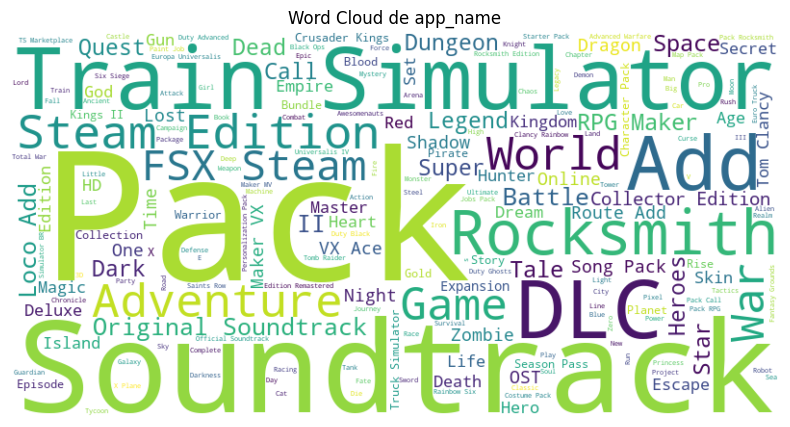

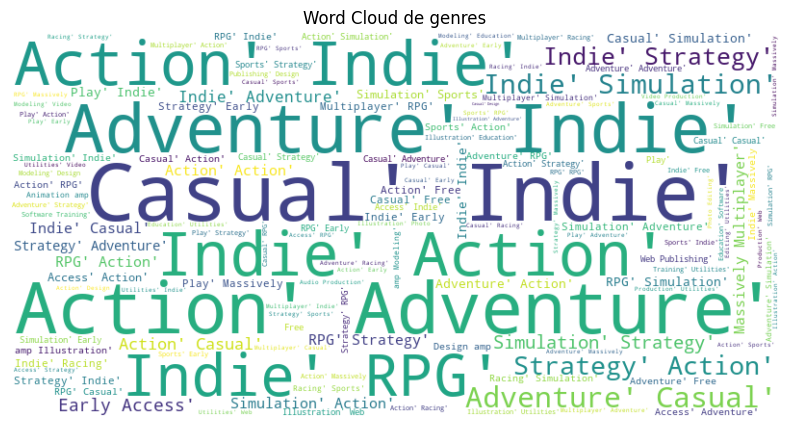

In [27]:

# Word Cloud para la columna 'app_name'
wordcloud_app_name = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['app_name']))

# Word Cloud para la columna 'genres'
wordcloud_genres = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['genres']))

# Graficar el Word Cloud de la columna 'app_name'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_app_name, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de app_name')
plt.show()

# Graficar el Word Cloud de la columna 'genres'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de genres')
plt.show()

El WordCloud de la columna "genres" y 'app_name' nos indica los nombres de videojuegos y géneros que más se repiten. Nos interesa en especial la columna "genres" porque es una variable que puede tener influencia directa en el precio del videojuego. 

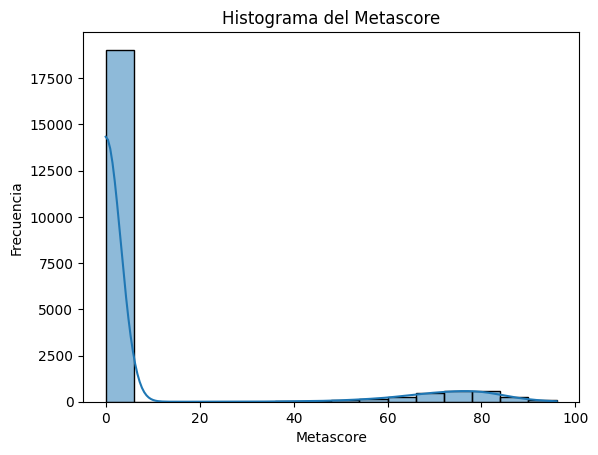

In [14]:
# Suponiendo que 'metascore' es una columna en el DataFrame df
sns.histplot(data=df1, x='metascore', kde=True)
plt.xlabel('Metascore')
plt.ylabel('Frecuencia')
plt.title('Histograma del Metascore')
plt.show()

El campo metascore muestra un altísimo porcentaje de valores nulos como previamente lo expusimos cuando limpiábamos el dataset. 

In [16]:
#Promedio histórico del precio
df1.metascore.mean()

8.352564102564102

In [17]:
df1.metascore.describe()

count    21528.000000
mean         8.352564
std         23.389657
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.000000
Name: metascore, dtype: float64

In [38]:
df1.head()

,genres,app_name,specs,price,early_access,id,sentiment,metascore,year,genre_id,spec_id
0,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,643980,Mostly Positive,0.0,2018,"[20, 3, 21, 10]","[17, 20, 24, 2, 27, 4, 9]"
1,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,"['Single-player', 'Multi-player', 'Online Mult...",0.00,False,670290,Mostly Positive,0.0,2017,"[17, 20, 3, 6, 11]","[17, 20, 24, 9, 14]"
2,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,"['Single-player', 'Steam Achievements']",3.99,False,772540,Mixed,0.0,2018,"[15, 12, 6]","[17, 27]"
3,"['Adventure', 'Casual', 'Indie', 'Simulation',...",The first thrust of God,"['Single-player', 'Steam Achievements', 'Steam...",1.59,False,773650,1 user reviews,0.0,2018,"[12, 17, 3, 6, 10]","[17, 27, 19]"
4,"['Action', 'Adventure', 'Indie']",The Warrior Of Treasures,['Single-player'],0.99,False,768060,3 user reviews,0.0,2018,"[15, 12, 3]",[17]
